I want to test here my hypothesis that abnormal volume can predict down or up movement in TASI

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

def symbol_to_path(symbol, base_dir="AdjDaily"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates,col):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'TASI' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'TASI')
    dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=['Date'],date_parser=dateparse, usecols=['Date', col ], na_values=['nan'])
        df_temp = df_temp.rename(columns={col: symbol})
        df = df.join(df_temp)

        if symbol == 'TASI':  # drop dates SPY did not trad
            df = df.dropna(subset=["TASI"])

    return df

def load_df():
    dates = pd.date_range('01/01/2009', '20/12/2018')
    N= (dates[-1]-dates[0])/365
    N = str(N).split()[0]
    files = os.listdir("AdjDaily")
    symbols=[]
    for name in files:
        if name[0].isdigit():
            symbols.append(name.split('.')[0])
    df = get_data(symbols, dates, 'Close')
    df.to_pickle('database.pkl')
    return df
def normalize_data(df):
    return df/df.iloc[0,:]

def compute_daily_returns(df):
    daily_returns = (df/df.shift(1))-1
    daily_returns = daily_returns[1:]
    return daily_returns

def stats(df,period):
    if period == 'W':
        p = 52.0
    if period == 'M':
        p = 12.0
    if period == 'D':
        p = 365.0
    cagr = (df.iloc[-1]/df.iloc[0])**(1.0/(len(df)/p)) - 1.0
    dr = compute_daily_returns(df)
    sharpe = np.sqrt(p) * dr.mean() / dr.std()
    print (' CAGR(%) = ' + str(cagr * 100))
    print (' Sharpe ratio = ' + str(sharpe))

def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1

def pos_val(df,capital=100000,alloc=[]):
    if alloc == []:
        alloc= 1.0/len(df.columns)
    return (normalize_data(df) * alloc * capital).sum(axis=1)

In [2]:
try:
    df = pd.read_pickle('database.pkl')
except:
    print ('No pkl')
    df = load_df()


In [20]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')
volume = pd.read_csv('AdjDaily/1010.csv',index_col='Date')

In [21]:
volume = volume[['Close','Vol']]
volume.head()

,Close,Vol
Date,,
31/12/2001,7.75,1747716
01/01/2002,7.75,4099612
02/01/2002,7.75,5878894
03/01/2002,7.88,2008516
05/01/2002,7.88,6041096


In [29]:
volume['180MVA'] = volume['Vol'].rolling(180).mean()
volume['180STD'] = volume['Vol'].rolling(180).std()

In [30]:
volume.head(200)

,Close,Vol,180MVA,180STD
Date,,,,
31/12/2001,7.75,1747716,NaN,NaN
01/01/2002,7.75,4099612,NaN,NaN
02/01/2002,7.75,5878894,NaN,NaN
03/01/2002,7.88,2008516,NaN,NaN
05/01/2002,7.88,6041096,NaN,NaN
06/01/2002,7.88,2805212,NaN,NaN
07/01/2002,7.75,4870512,NaN,NaN
08/01/2002,7.88,4257510,NaN,NaN
09/01/2002,7.88,3521270,NaN,NaN


In [37]:
buysignal = volume['Vol'] > (1.5 * volume['180STD'])
df['signal'] = np.where(buysignal == True,1,0)

ValueError: Length of values does not match length of index

In [34]:
volume.head(500)

,Close,Vol,180MVA,180STD,signal
Date,,,,,
31/12/2001,7.75,1747716,NaN,NaN,False
01/01/2002,7.75,4099612,NaN,NaN,False
02/01/2002,7.75,5878894,NaN,NaN,False
03/01/2002,7.88,2008516,NaN,NaN,False
05/01/2002,7.88,6041096,NaN,NaN,False
06/01/2002,7.88,2805212,NaN,NaN,False
07/01/2002,7.75,4870512,NaN,NaN,False
08/01/2002,7.88,4257510,NaN,NaN,False
09/01/2002,7.88,3521270,NaN,NaN,False


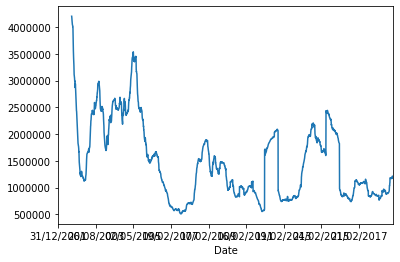

In [35]:
volume['180MVA'].plot()
